In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
par_sort_df = pd.read_csv('par_sort.csv')
par_sort_df

,size,thread_count,cutoff,time
0,262144,1,510000,55.6
1,262144,1,560000,19.0
2,262144,1,610000,19.1
3,262144,1,660000,19.4
4,262144,1,710000,16.8
...,...,...,...,...
345,16777216,16,760000,670.2
346,16777216,16,810000,672.2
347,16777216,16,860000,665.2
348,16777216,16,910000,665.5


In [3]:
def split_on_size(df, size):
    return df.loc[df['size'] == size][['thread_count', 'cutoff', 'time']]

def split_on_thread_count(df, thread_count):
    return df.loc[df['thread_count'] == thread_count][['cutoff', 'time']]

def plot(df):
    thread_1_df = split_on_thread_count(df, 1)
    thread_2_df = split_on_thread_count(df, 2)
    thread_4_df = split_on_thread_count(df, 4)
    thread_8_df = split_on_thread_count(df, 8)
    thread_16_df = split_on_thread_count(df, 16)
    plt.plot(thread_1_df["cutoff"], thread_1_df["time"], 'm', label = '1 thread')
    plt.plot(thread_2_df["cutoff"], thread_2_df["time"], 'r', label = '2 threads')
    plt.plot(thread_4_df["cutoff"], thread_4_df["time"], 'b', label = '4 threads')
    plt.plot(thread_8_df["cutoff"], thread_8_df["time"], 'g', label = '8 threads')
    plt.plot(thread_16_df["cutoff"], thread_16_df["time"], 'y', label = '16 threads')
    plt.xlabel("cutoff")
    plt.ylabel("time in milliseconds")
    plt.legend()
    plt.show()

Array Size: 262144


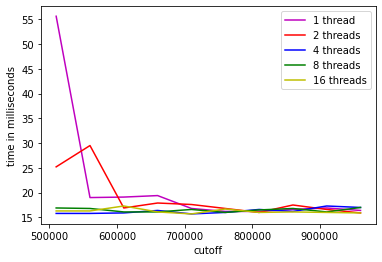

Array Size: 524288


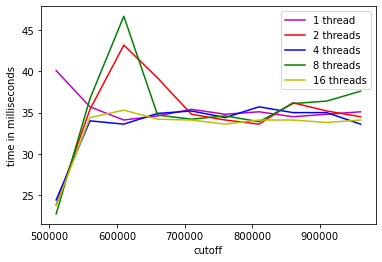

Array Size: 1048576


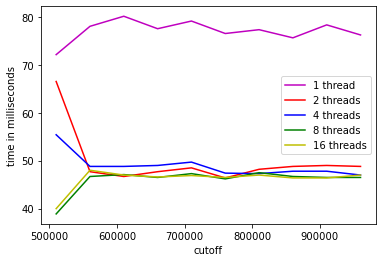

Array Size: 2097152


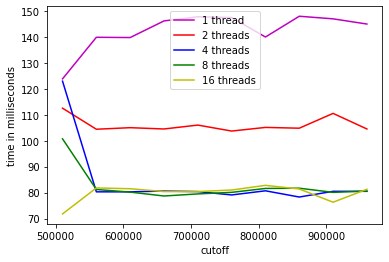

Array Size: 4194304


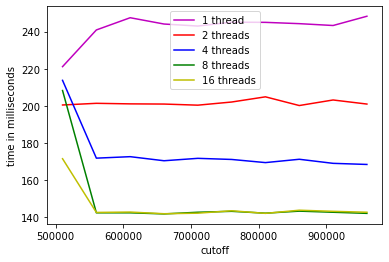

Array Size: 8388608


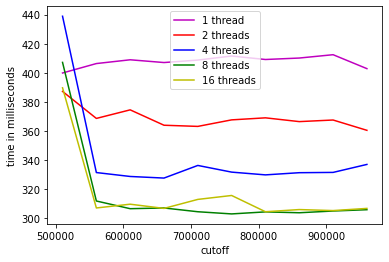

Array Size: 16777216


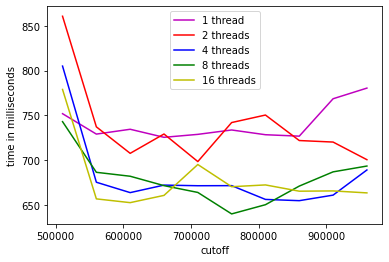

In [4]:
for i in par_sort_df['size'].unique():
    print("Array Size: " + str(i))
    plot(par_sort_df.loc[par_sort_df['size'] == i])